In [1]:
# Importing packages
import numpy as np

In [2]:
ITEMS = 1682
USERS = 943

In [3]:
# This function reads data from file and writes it to target, a numpy array
def read_data(file, target):
    with open(file) as f:
        line = f.readline()
        while line:
            user, item, rating, _ = line.split()
            target[int(user)-1][int(item)-1] = int(rating)
            line = f.readline()

In [4]:
# Here we read in the ratings in u1.base

u1_train_data = np.zeros((USERS, ITEMS))

read_data(".\\ml-100k\\u1.base", u1_train_data)

In [5]:
# Generate the average rating for each user

averages = [np.average(user, weights=user.astype(bool)) for user in u1_train_data]

# Find which items are rated by each user and which users rated each item
rated_items = [{k for k in range(ITEMS) if u1_train_data[i][k] > 0} for i in range(USERS)]
rated_users = [{k for k in range(USERS) if u1_train_data[k][i] > 0} for i in range(ITEMS)]

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(array([  2.,   5.,   8.,  36., 118., 232., 299., 170.,  59.,  14.]),
 array([1.51834862, 1.85347028, 2.18859194, 2.5237136 , 2.85883526,
        3.19395692, 3.52907858, 3.86420024, 4.1993219 , 4.53444356,
        4.86956522]),
 <BarContainer object of 10 artists>)

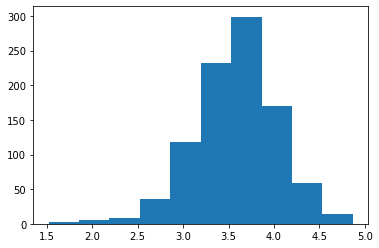

In [12]:
# histogram of average ratings by each user

fig1, ax1 = plt.subplots()
ax1.hist(averages, 10)

(array([893., 257., 161.,  96.,  71.,  64.,  34.,  29.,  24.,  20.,   9.,
          5.,   7.,   0.,   4.,   1.,   5.,   1.,   0.,   1.]),
 array([  0. ,  24.2,  48.4,  72.6,  96.8, 121. , 145.2, 169.4, 193.6,
        217.8, 242. , 266.2, 290.4, 314.6, 338.8, 363. , 387.2, 411.4,
        435.6, 459.8, 484. ]),
 <BarContainer object of 20 artists>)

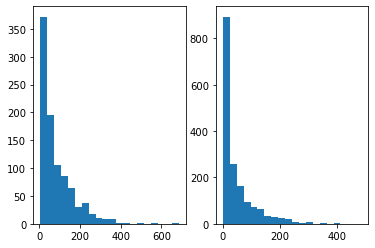

In [16]:
# histogram of # of items each user rated and
# histogram of # of user that rated each item 

fig2, ax2 = plt.subplots(1, 2)
ax2[0].hist([len(rated_items[user]) for user in range(USERS)], 20)
ax2[1].hist([len(rated_users[item]) for item in range(ITEMS)], 20)